# Multi class classification network

DISCLAIMER: You need to download and save the keystroke dataset in the data/Keystrokes folder. The dataset is not included in the repository due to its size. You can download the dataset from the following link: https://userinterfaces.aalto.fi/136Mkeystrokes/

When you have downloaded and unzipped the dataset, you can run the following code to generate the datasets and train the model.


## Data handling and pre processing

We first save the data in custom datasets. Each participant wrote 15 sentences. We take 10 of each participant to train the model. Only run this cell if you need to regenerate datasets, e.g. if you need more or fewer datasets.


Load the saved dataset and extract the features and target variable.

In [1]:
from src.data_processor import KeystrokeDataReader
data_processor = KeystrokeDataReader()
keystroke_df = data_processor.read_keystroke_data('../data/Keystrokes/files/*_keystrokes.txt', 1000)
data_processor.save_keystroke_dataset(keystroke_df, 10)

Reading keystroke data from files matching the pattern: ../data/Keystrokes/files/*_keystrokes.txt
current working directory:  /Users/miamahncke/Development/keystroke_gen/src


---
Get the share of data reserverd for training and testing.
NOTE: Run the script from this point if you have restarted the kernel but do not want to rewrite the data.

In [25]:
from src.data_processor import KeystrokeDataReader
from sklearn.model_selection import train_test_split
from src.label_encoder import KeystrokeLabelEncoder

data_processor = KeystrokeDataReader()
# Load the dataset
dataset = data_processor.get_train_data()

# Extract features and target variable
X = dataset.data  # Features
y = dataset.labels  # Target labels 
# Encode the target variable (PARTICIPANT_ID) using LabelEncoder
label_encoder = KeystrokeLabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


## Neural network model training
---

Train the neural network model. When running this, the trained model will be saved in the model.npy file.

In each 100th epoch, we print the mean squared error of the model.
Feel free to vary the hidden layers and the number of epochs or learning rate to see how the model performs.

Epoch 0, Loss: 19.659319077666034, Validation Loss: 8.251938128890385
Epoch 100, Loss: 6.927265581056608, Validation Loss: 6.936076001552331
Epoch 200, Loss: 6.917255243217576, Validation Loss: 6.924438956939257
Epoch 300, Loss: 6.913500787908615, Validation Loss: 6.919517701222431
Epoch 400, Loss: 6.911456511982078, Validation Loss: 6.9166678134344215
Epoch 500, Loss: 6.910342801590308, Validation Loss: 6.915111346591893
Epoch 600, Loss: 6.909749893894882, Validation Loss: 6.91430271395846
Epoch 700, Loss: 6.909395176593844, Validation Loss: 6.913734524589959
Epoch 800, Loss: 6.9091670969643015, Validation Loss: 6.913332479105841
Epoch 900, Loss: 6.90900191853367, Validation Loss: 6.913012554377089
Epoch 1000, Loss: 6.90886751405722, Validation Loss: 6.912734517944264
Epoch 1100, Loss: 6.908739431190912, Validation Loss: 6.912475733292655
Epoch 1200, Loss: 6.908638618406609, Validation Loss: 6.91225726933516
Epoch 1300, Loss: 6.908557798962526, Validation Loss: 6.91207283318883
Epoch 

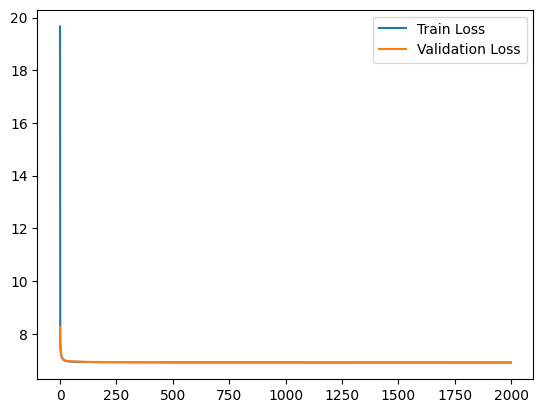

prediction:  [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
accuracy:  0.0025
precision:  2.959276800098485e-06


In [30]:
import numpy as np
from neural_network import NeuralNetwork
# Initialize and train the neural network model
layers = [X_train.shape[1], 4, len(label_encoder.label_map)]
nn = NeuralNetwork(layer_structure=layers, learning_rate=0.00001, activation='relu')
nn.train(X_train, y_train, epochs=2000)


# Get predictions and calculate the mean squared error
y_pred = nn.get_prediction(X_test)
nn.plot_learning()
nn.save_model('model')
print("prediction: ", y_pred)
print("accuracy: ", nn.calculate_accuracy(y_test, y_pred))
print("precision: ", nn.calculate_macro_precision(y_test, y_pred))


## Making predictions

NOTE: run the script from this point if you have already generated the datasets and split the data into training and testing sets.

In the following cell, we load the trained model and use it to predict the participant ID of 10 random sentences. 
We print the predicted and true participant IDs. You can choose one and get the models prediction in the next cell.

In [4]:
from neural_network import NeuralNetwork
from sklearn.preprocessing import LabelEncoder
import numpy as np

# load the model
nn = NeuralNetwork(file='model.npy', layer_structure=None)

# Encode the target variable (PARTICIPANT_ID) using LabelEncoder
label_encoder = LabelEncoder()
unseen_data = data_processor.get_classify_data()
unseen_y = unseen_data.labels
unseen_y_encoded = label_encoder.fit_transform(unseen_y)
unseen_X = unseen_data.data

indices = np.random.choice(unseen_X.shape[0], 3, replace=False)
for i in indices:
    print(f"Index:{i}, Participant ID: {unseen_y[i]}, Keystroke features: {unseen_X[i]}")
# generate random indices
# print sentences and participant ids

# show 10 participants with their sentences. User selects one that is predicted by model

Index:627, Participant ID: 157269, Keystroke features: [-1.94942522e-09  2.28387607e-09 -3.86119219e-09  8.84143718e-09
  9.63190679e-09  4.72751631e-09  3.38276543e-09  2.54052587e-08
 -1.07608897e+00  1.60000000e+01]
Index:2064, Participant ID: 285424, Keystroke features: [-1.05232425e-09  4.77180214e-09 -5.29995772e-09  2.36261384e-08
  3.99126871e-08  5.78784855e-08  5.52288233e-09  3.14597185e-07
 -1.81910491e+00  1.60000000e+01]
Index:2757, Participant ID: 353911, Keystroke features: [ 1.04814824e-09  2.64304854e-09 -3.98239819e-09  1.14816723e-08
  1.55413909e-08  1.40806603e-08  3.10662129e-09  7.80797490e-08
 -1.07608897e+00  2.20000000e+01]


In [7]:
index = 3747
pred, _ = nn.forward(unseen_X[index])
print(f"Predicted participant ID: {label_encoder.inverse_transform([np.argmax(pred)])}, True participant ID: {unseen_y[index]}")

Predicted participant ID: [1057], True participant ID: 448383


## Training with generated datasets

My chosen dataset of keystroke dynamics does not work well, therefore I provide fake data to see the working of the model.
The following cell generates a dataset with 1000 observations and 3 labels. We then train a neural network model on the dataset and make predictions on the test set. We print the accuracy and precision of the model.

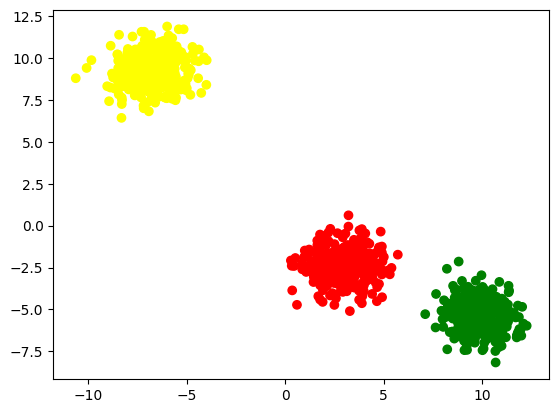

Epoch 0, Loss: 0.4255431489338174, Validation Loss: 0.42551587346216485
Epoch 100, Loss: 0.41521099193842836, Validation Loss: 0.42517071628045067
Epoch 200, Loss: 0.40533405147334445, Validation Loss: 0.4233973735585342
Epoch 300, Loss: 0.39441626128723223, Validation Loss: 0.4194506545732268
Epoch 400, Loss: 0.38143079370891464, Validation Loss: 0.4125157002470427
_________ 
 accuracy:  0.97
_________ 
 macro-precision:  0.9711196471759852


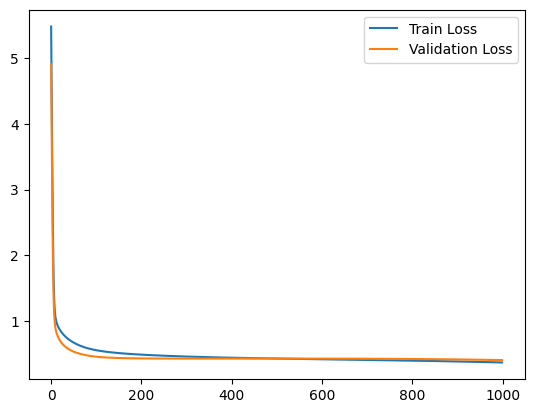

In [24]:
import matplotlib
from sklearn.datasets import make_blobs
import src.data_processor as data_processor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from neural_network import NeuralNetwork
import matplotlib.pyplot as plt

 # color map for better visualization
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

# Generating 1000 observations with 10 labels
data_gen, labels_gen = make_blobs(n_samples=1000, centers=3, n_features=3, random_state=30)

# plot
plt.scatter(data_gen[:, 0], data_gen[:, 1], c=labels_gen, cmap=my_cmap)
plt.show()

# one hot encoding for y
label_encoder_gen = KeystrokeLabelEncoder()
y_encoded = label_encoder_gen.fit_transform(labels_gen)

# split the data
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(data_gen, y_encoded, stratify=labels_gen, test_size=0.2, random_state=42)

# Create a neural network instance
layer_structure_gen = [X_train.shape[1], 4, 2, 3]
nn_gen = NeuralNetwork(file=None, layer_structure=layer_structure_gen, learning_rate=0.00002, activation='relu')

# Train the neural network and make predictions on training data
nn.train(X_train_g, y_train_g, epochs=500)
predictions = nn.get_prediction(X_test_g)
print("_________ \n accuracy: ", nn.calculate_accuracy(y_test_g, predictions))
print("_________ \n macro-precision: ", nn.calculate_macro_precision(y_test_g, predictions))
nn.plot_learning()